In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

2023-01-09 14:25:35.230656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# have our dataset
X = tf.range(-100, 100, 2)
y = tf.add(X,X)

2023-01-09 14:25:53.518539: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(100, 100)

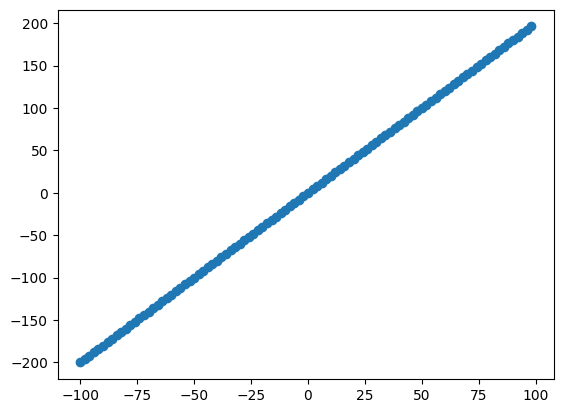

In [3]:
# X.shape, y.shape
plt.scatter(X,y)
len(X), len(y)

In [4]:
# split the training and the testing dataset

X_train = X[:80]
y_train = y[:80]

X_test = X[80:]
y_test = y[80:]

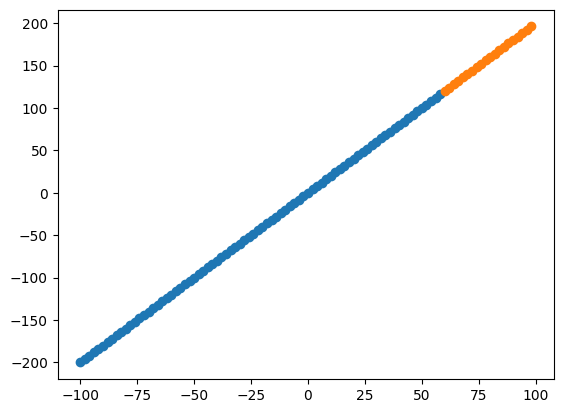

In [5]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [6]:
# create a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10, input_shape=[1]),
        tf.keras.layers.Dense(1)
    ]
)

# compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss= tf.keras.losses.mae,
    metrics=["mse"]
)

# fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
3/3 [==============================] - 3s 31ms/step - loss: 48.0674 - mse: 4344.6743
Epoch 2/200
3/3 [==============================] - 0s 15ms/step - loss: 36.6317 - mse: 2226.7622
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 39.0648 - mse: 2551.9878
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 41.3877 - mse: 2727.0278
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 31.7282 - mse: 1540.5946
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 34.4045 - mse: 1729.2281
Epoch 7/200
3/3 [==============================] - 0s 17ms/step - loss: 28.6237 - mse: 1993.9008
Epoch 8/200
3/3 [==============================] - 0s 17ms/step - loss: 31.5013 - mse: 1536.4547
Epoch 9/200
3/3 [==============================] - 0s 17ms/step - loss: 39.9453 - mse: 2627.1794
Epoch 10/200
3/3 [==============================] - 0s 16ms/step - loss: 32.9036 - mse: 1607.4021
Epoch 11/200
3/3 [===========

In [7]:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 540ms/step


In [8]:
y_test.shape

TensorShape([20])

In [9]:
y_pred = tf.squeeze(y_pred)

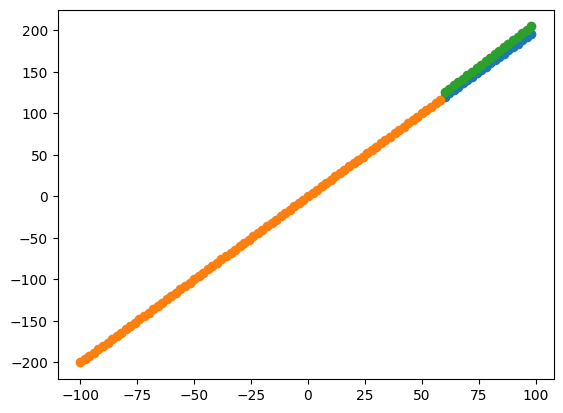

In [10]:
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred)

In [12]:
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mae = tf.metrics.mean_absolute_error(y_test, y_pred)

mae.numpy(), mse.numpy()

(6.881704, 48.414253)

In [13]:
# loading the h5 format and making pred on it

load_h5 = tf.keras.models.load_model("../Night/model_3_hdf5_format.h5")
load_h5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [15]:
h5_pred = load_h5.predict(X_test)
model_3_preds = model.predict(X_test)
model_3_preds == h5_pred

1/1 [==============================] - 0s 36ms/step


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

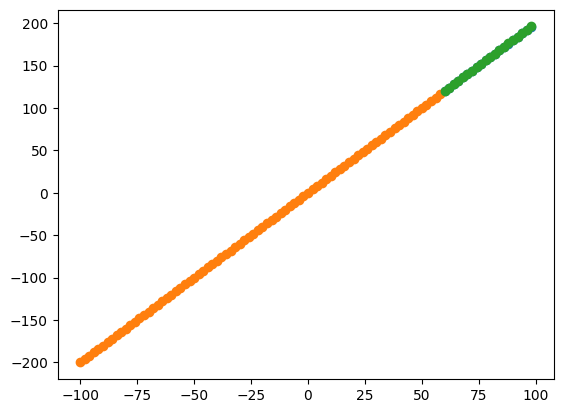

In [17]:
plt.scatter(X_test, y_test)
plt.scatter(X_train, y_train)
plt.scatter(X_test, h5_pred)

In [24]:
mae_h5 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(h5_pred))
mae_h5.numpy(), mae.numpy()

(0.06422806, 6.881704)